In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
twopi = 2*np.pi   # 2pi
wavelength = 1    # electron wavelength / Angstrom
C_s = 1           # third-order spherical aberration constant / units

k = np.arange(0, 2, 1e-3)
dz = 10 #np.arange(0, 4e4, 1e1)

k_hat = k / (wavelength * C_s)**(1/2)   # dimensionless wavevector
dz_hat = dz / (wavelength * C_s)**(1/4) # dimensionless defocus

In [39]:
def CTF(k_hat, dz_hat):
  return  2*np.sin(twopi * (-1/2 * k_hat**2 + 1/4 * dz_hat * k_hat**4) )

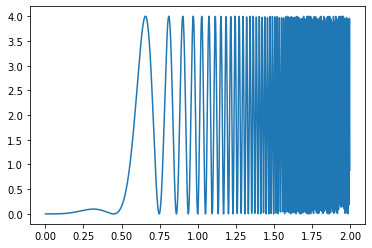

In [41]:
plt.plot(k_hat, CTF(k_hat,dz_hat)**2)